# Лабораторна робота #2
## З дисципліни Інтелектуальний аналіз даних
## Студента групи МІТ-31
## __Єрмакова Юрія__


## Базова ініціалізація

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

1. Створити набір даних за допомогою DatasetGenerator

In [2]:
COUNT = 1000

x, y, z = make_regression(n_samples=COUNT, n_features=1, n_informative=100, noise=10, coef=True, random_state=1)

model_1 = pd.DataFrame(data={
    'X': x.flatten(),
    'Y': y,
    'Z': z
})

model_2 = pd.DataFrame(data={
    'X': [np.random.uniform(-4.0, 4.0) for i in range(COUNT)],
    'Y': [np.random.uniform(-180.0, 180.0) for i in range(COUNT)],
    'Z': ['90.0' for i in range(COUNT)]
})

2. Завантажити набір даних для регресії на сайті (у кожного студента має бути інший - прошу організуватись відповідним чином)

In [3]:
model = pd.read_csv('./Pokemon.csv')

print(model)
model.describe()

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<AxesSubplot:>

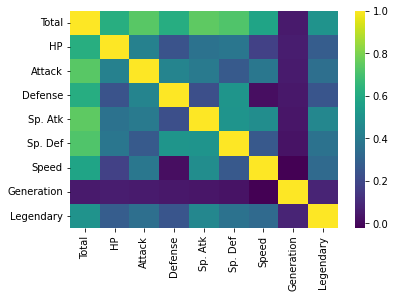

In [4]:
try:
    model.pop('#')
except KeyError:
    pass

sb.heatmap(model.corr(), cmap='viridis')


In [5]:
model.to_csv('data.csv')

In [6]:
model['Legendary'].value_counts()


False    735
True      65
Name: Legendary, dtype: int64

3. Для отриманих наборів даних провести встановленні кроки моделювання.

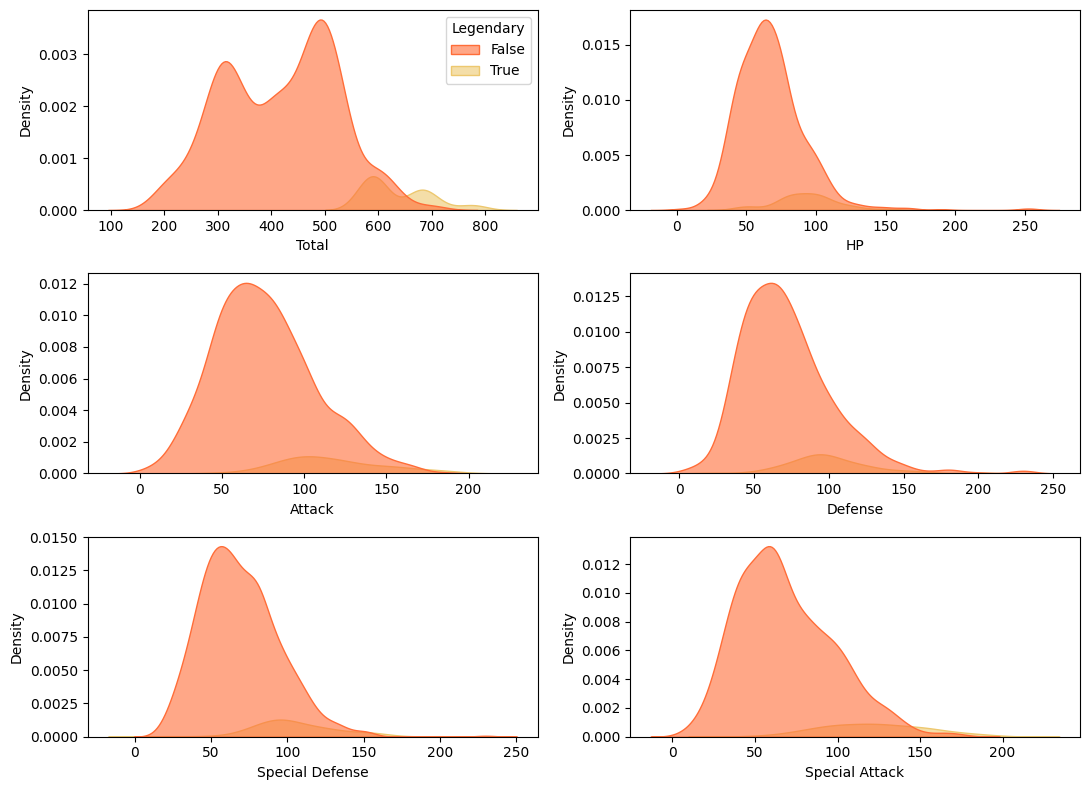

In [7]:
fig, axes = plt.subplots(3, 2, figsize=(11,8), dpi=100)
sb.set_palette('rainbow_r')

HUE = 'Legendary'
# HUE = 'Generation'

sb.kdeplot(ax=axes[0,0], data=model, x='Total', hue=HUE, alpha=0.6, shade=True)
axes[0,0].set_xlabel('Total')

sb.kdeplot(ax=axes[0,1], data=model, x='HP', hue=HUE, alpha=0.6, shade=True)
axes[0,1].set_xlabel('HP')
axes[0,1].get_legend().remove()

sb.kdeplot(ax=axes[1,0], data=model, x='Attack', hue=HUE, alpha=0.6, shade=True)
axes[1,0].set_xlabel('Attack')
axes[1,0].get_legend().remove()

sb.kdeplot(ax=axes[1,1], data=model, x='Defense', hue=HUE, alpha=0.6, shade=True)
axes[1,1].set_xlabel('Defense')
axes[1,1].get_legend().remove()

sb.kdeplot(ax=axes[2,1], data=model, x='Sp. Atk', hue=HUE, alpha=0.6, shade=True)
axes[2,1].set_xlabel('Special Attack')
axes[2,1].get_legend().remove()

sb.kdeplot(ax=axes[2,0], data=model, x='Sp. Def', hue=HUE, alpha=0.6, shade=True)
axes[2,0].set_xlabel('Special Defense')
axes[2,0].get_legend().remove()

plt.tight_layout()


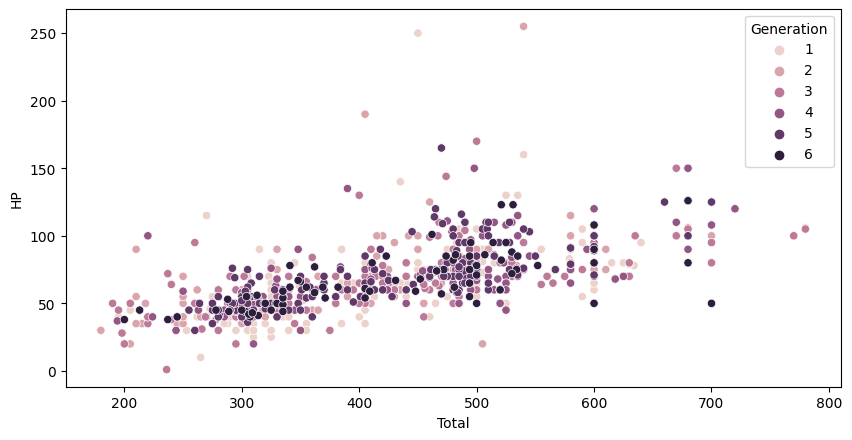

In [8]:
HUE = 'Generation'

plt.figure(figsize=(10, 5), dpi=100)
sb.scatterplot(data=model, x='Total', y='HP', hue=HUE)
plt.xlabel('Total')
plt.ylabel('HP')
plt.show()

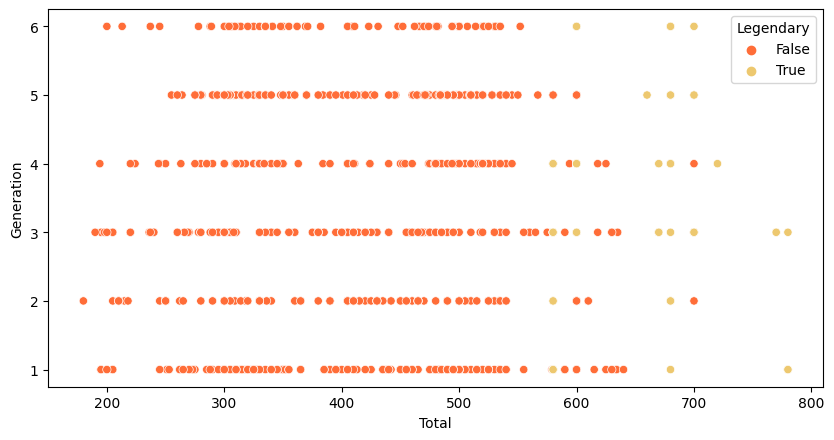

In [9]:
HUE = 'Legendary'

plt.figure(figsize=(10, 5), dpi=100)
sb.scatterplot(data=model, x='Total', y='Generation', hue=HUE)
plt.xlabel('Total')
plt.ylabel('Generation')
plt.show()

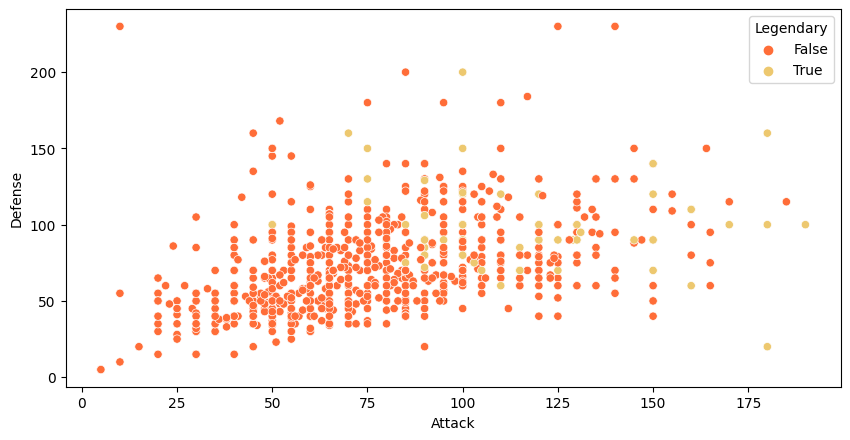

In [10]:
HUE = 'Legendary'

plt.figure(figsize=(10, 5), dpi=100)
sb.scatterplot(data=model, x='Attack', y='Defense', hue=HUE)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()